In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Open data file
df = pd.read_csv('2_Data for EDA.csv')
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [3]:
df

,date,location,rainfall,discharge,r_d_n-0,r_d_n-1,r_d_n-2,r_d_n-3,r_d_n-4,r_d_n-5,...,d_d_n+1,d_d_n+2,d_d_n+3,d_d_n+4,d_d_n+5,days_since_rain,month,season_str,season_int,target
0,2022-04-01,Newbury,0.29,0.0,0.29,0.29,0.29,0.29,0.29,0.29,...,0.0,0.0,0.0,0.0,0.0,0,4,Spring,1,0
1,2022-04-02,Newbury,0.12,0.0,0.12,0.41,0.41,0.41,0.41,0.41,...,0.0,0.0,0.0,0.0,0.0,0,4,Spring,1,0
2,2022-04-03,Newbury,4.14,0.0,4.14,4.26,4.55,4.55,4.55,4.55,...,0.0,0.0,0.0,0.0,0.0,0,4,Spring,1,0
3,2022-04-04,Newbury,0.21,0.0,0.21,4.35,4.47,4.76,4.76,4.76,...,0.0,0.0,0.0,0.0,0.0,0,4,Spring,1,0
4,2022-04-05,Newbury,0.88,0.0,0.88,1.09,5.23,5.35,5.64,5.64,...,0.0,0.0,0.0,0.0,0.0,0,4,Spring,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2024-12-27,Newbury,0.38,0.0,0.38,0.68,1.02,1.11,1.38,1.40,...,0.0,0.0,0.0,0.0,0.0,0,12,Winter,4,0
1002,2024-12-28,Newbury,0.18,0.0,0.18,0.56,0.86,1.20,1.29,1.56,...,0.0,0.0,0.0,0.0,0.0,0,12,Winter,4,0
1003,2024-12-29,Newbury,0.01,0.0,0.01,0.19,0.57,0.87,1.21,1.30,...,0.0,0.0,0.0,0.0,0.0,1,12,Winter,4,0
1004,2024-12-30,Newbury,0.01,0.0,0.01,0.02,0.20,0.58,0.88,1.22,...,0.0,0.0,0.0,0.0,0.0,2,12,Winter,4,0


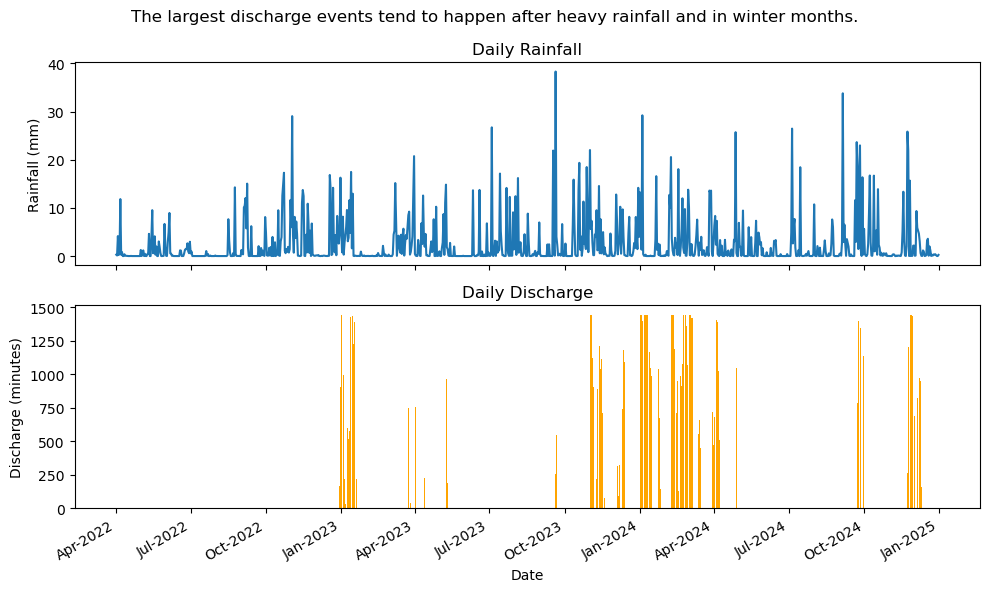

In [4]:
# Create figure with 2 rows, 1 column of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('The largest discharge events tend to happen after heavy rainfall and in winter months.')
# First plot (rainfall)
ax1.plot(df["date"], df["rainfall"])
ax1.set_ylabel("Rainfall (mm)")
ax1.set_title("Daily Rainfall")

# Second plot (discharge)
ax2.bar(df["date"], df["discharge"], color="orange")
ax2.set_ylabel("Discharge (minutes)")
ax2.set_title("Daily Discharge")
ax2.set_xlabel("Date")

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))  
# Rotate dates for readability
fig.autofmt_xdate()

# Improve spacing
plt.tight_layout()
plt.show()

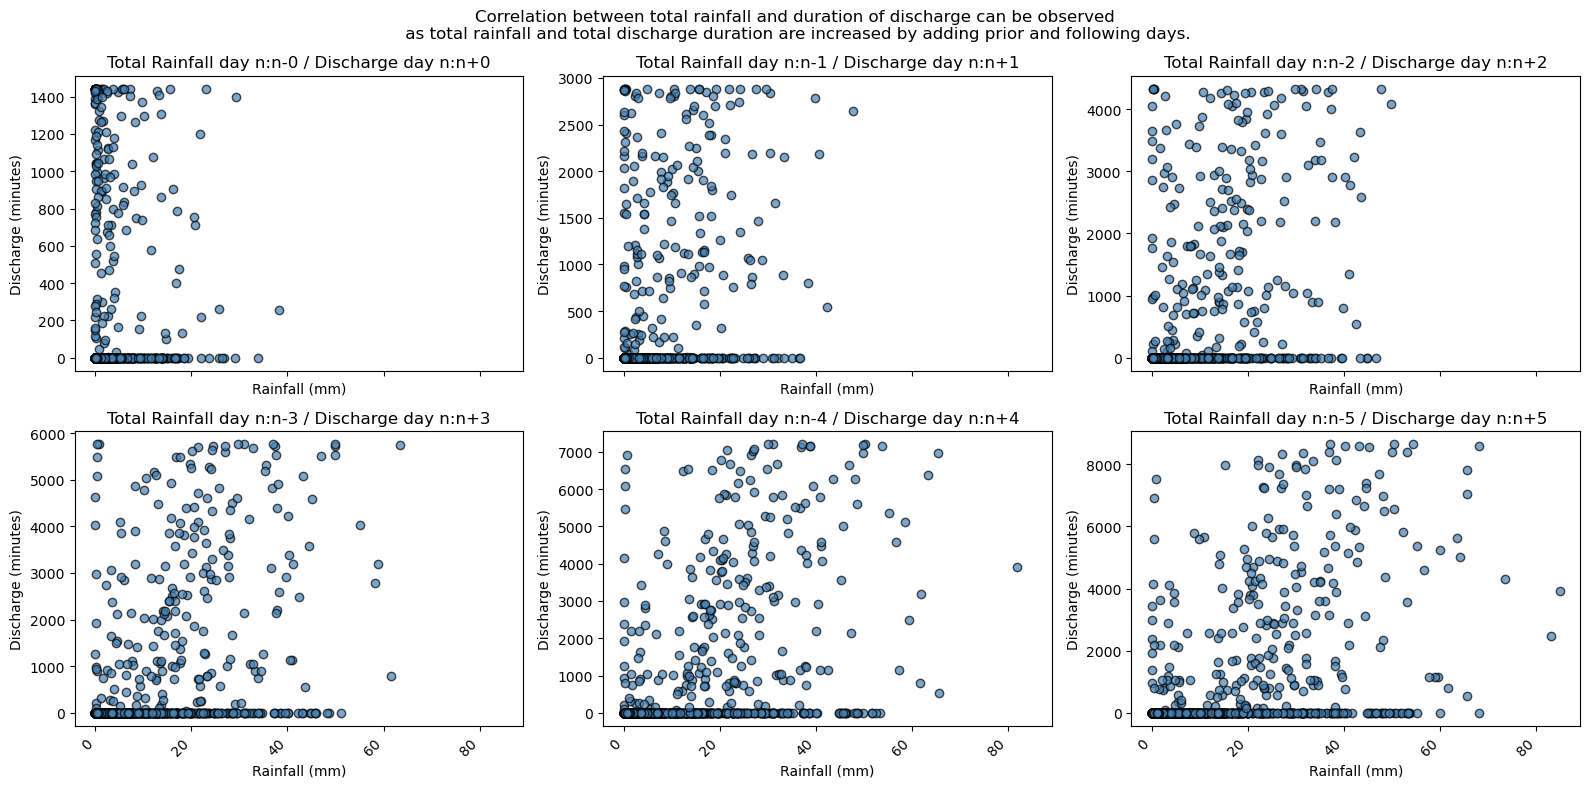

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axes = axes.flatten()
fig.suptitle('Correlation between total rainfall and duration of discharge can be observed\n as total rainfall and total discharge duration are increased by adding prior and following days.')

for i in range(6):
    x = 'r_d_n-' + str(i)
    y = 'd_d_n+' + str(i)
    axes[i].scatter(df[x], df[y], alpha=0.7, color="steelblue", edgecolor="black")
    axes[i].set_title(f'Total Rainfall day n:n-{i} / Discharge day n:n+{i}')
    axes[i].set_xlabel('Rainfall (mm)')
    axes[i].set_ylabel('Discharge (minutes)')
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

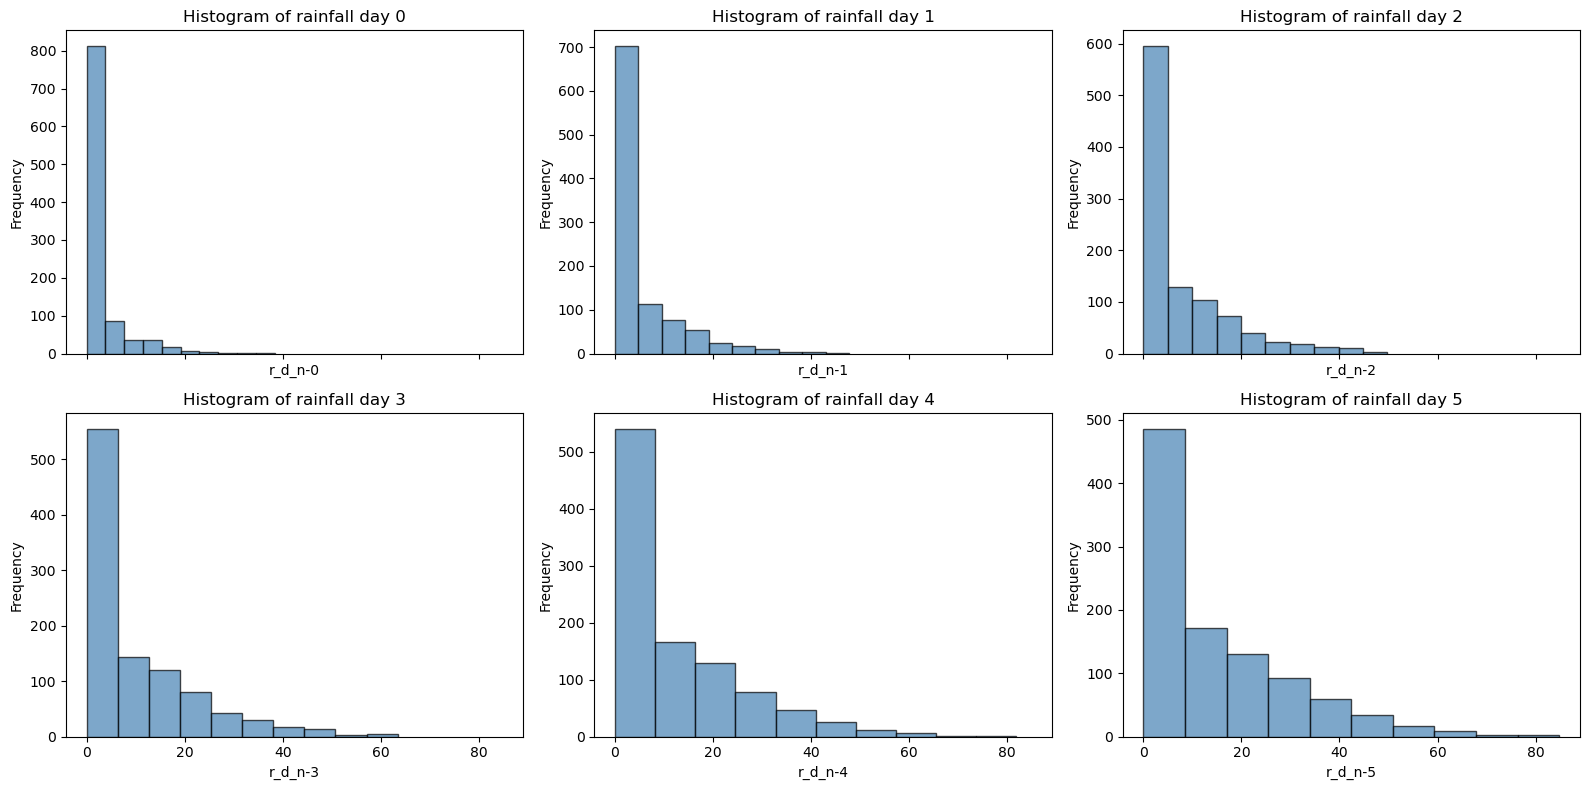

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axes = axes.flatten()
# Number of bins for histograms
b = 10
for i in range(6):
    x = 'r_d_n-' + str(i)
    axes[i].hist(df[x], bins=b, alpha=0.7, color="steelblue", edgecolor="black")
    axes[i].set_title(f'Histogram of rainfall day {i}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

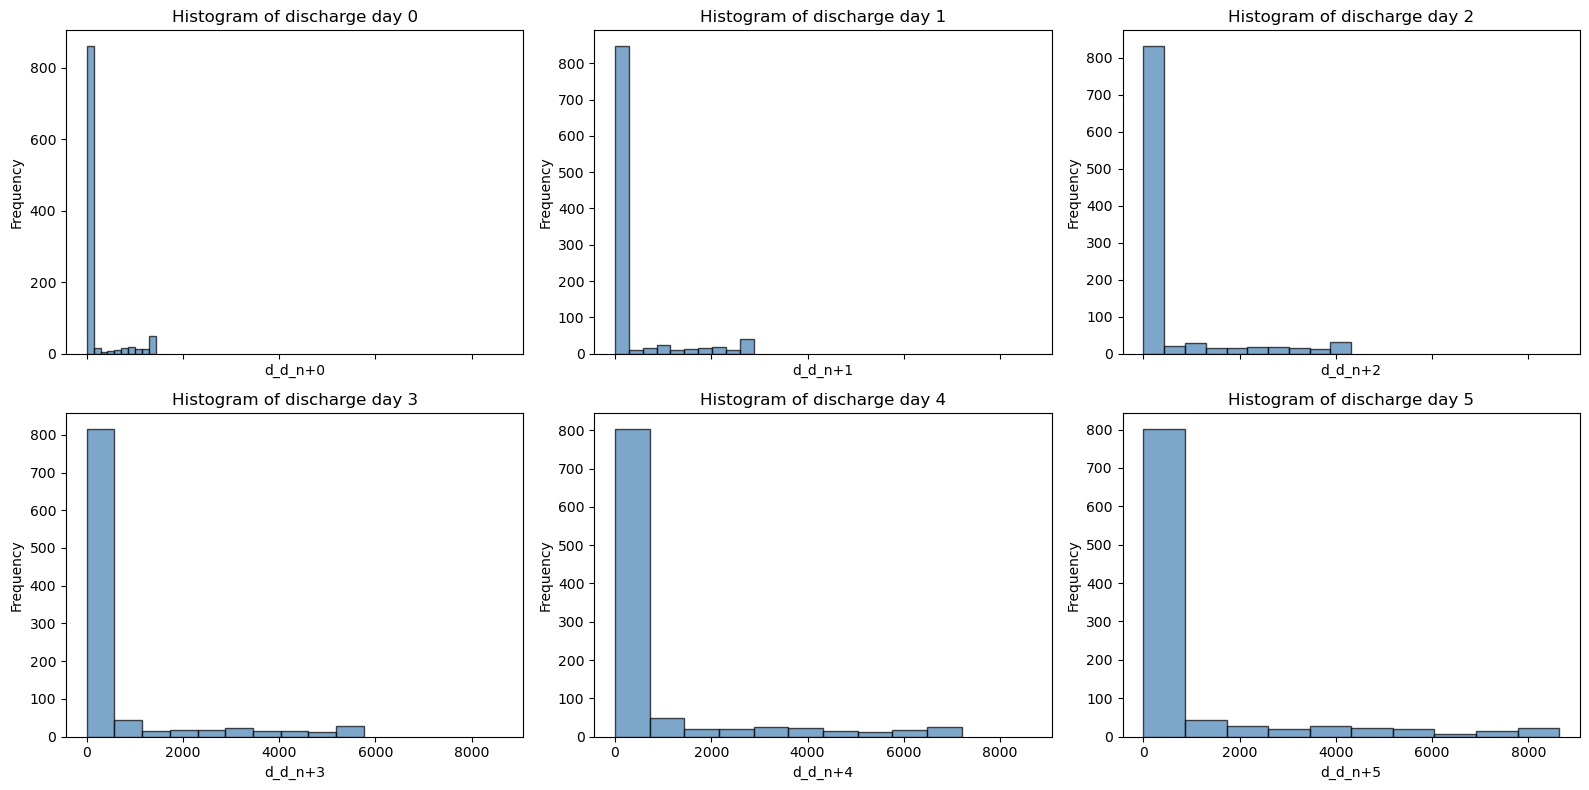

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axes = axes.flatten()
# Number of bins for histograms
b = 10
for i in range(6):
    y = 'd_d_n+' + str(i)
    axes[i].hist(df[y], bins=b, alpha=0.7, color="steelblue", edgecolor="black")
    axes[i].set_title(f'Histogram of discharge day {i}')
    axes[i].set_xlabel(y)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
cols = ['r_d_n-0', 'r_d_n-1', 'r_d_n-2', 'r_d_n-3', 'r_d_n-4', 'r_d_n-5', 'd_d_n+0', 'd_d_n+1', 'd_d_n+2', 'd_d_n+3', 'd_d_n+4', 'd_d_n+5']
corr_matrix = df[cols].corr().round(2)
print(corr_matrix.iloc[6:12,0:6])

         r_d_n-0  r_d_n-1  r_d_n-2  r_d_n-3  r_d_n-4  r_d_n-5
d_d_n+0     0.13     0.30     0.38     0.42     0.46     0.47
d_d_n+1     0.25     0.38     0.43     0.47     0.49     0.50
d_d_n+2     0.28     0.38     0.44     0.47     0.49     0.50
d_d_n+3     0.28     0.39     0.44     0.47     0.48     0.49
d_d_n+4     0.29     0.39     0.44     0.46     0.48     0.48
d_d_n+5     0.29     0.38     0.43     0.45     0.46     0.47


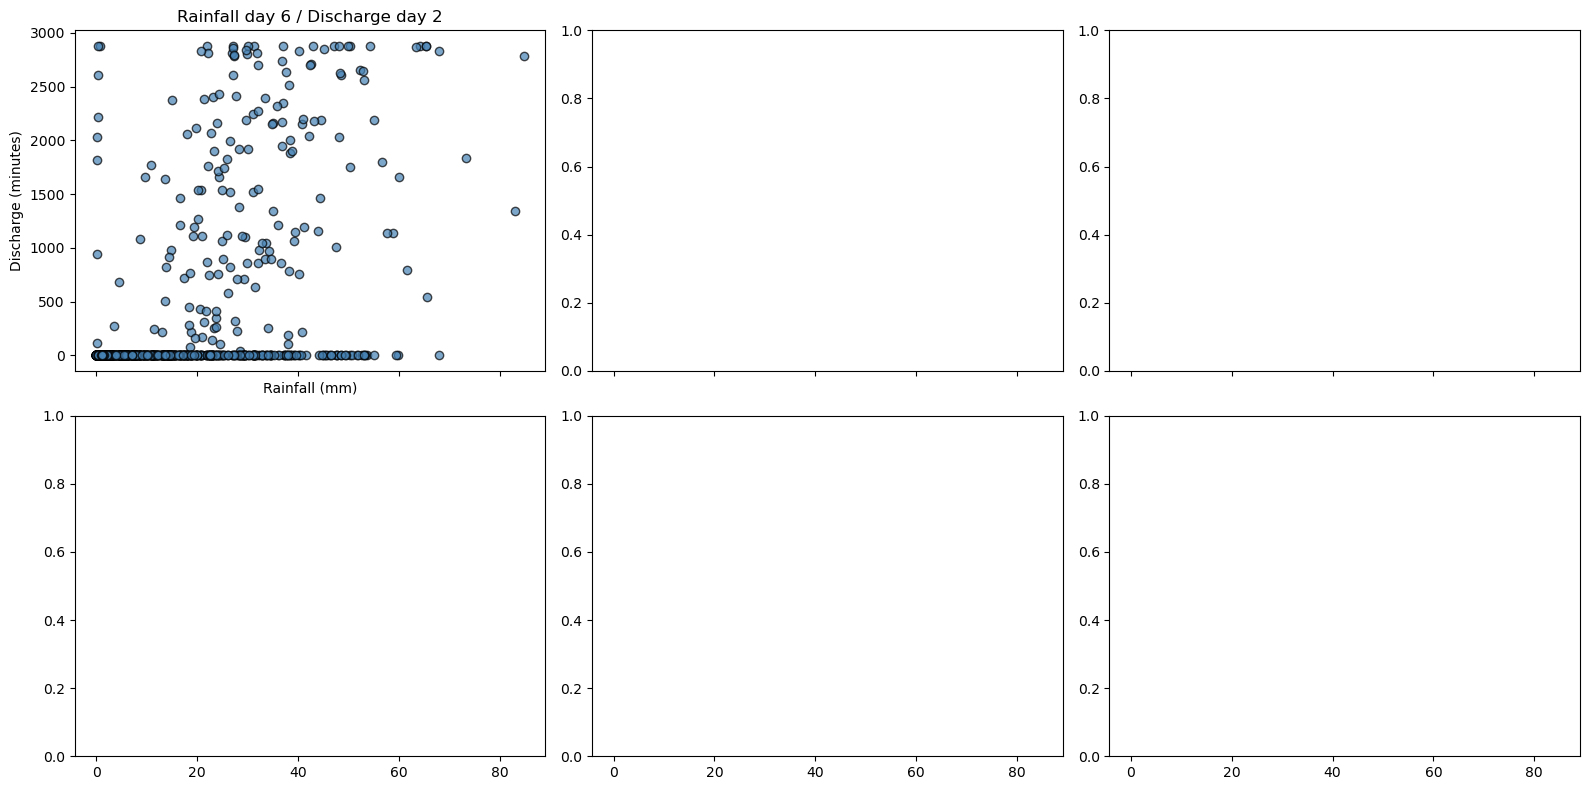

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axes = axes.flatten()

i = 0
x = 'r_d_n-5'
y = 'd_d_n+1'
axes[i].scatter(df[x], df[y], alpha=0.7, color="steelblue", edgecolor="black")
axes[i].set_title(f'Rainfall day 6 / Discharge day 2')
axes[i].set_xlabel('Rainfall (mm)')
axes[i].set_ylabel('Discharge (minutes)')
plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [10]:
cols = ['d_d_n+0', 'd_d_n+1', 'd_d_n+2', 'd_d_n+3', 'd_d_n+4', 'd_d_n+5', 'days_since_rain', 'month', 'season_int']
corr_matrix = df[cols].corr().round(2)
print(corr_matrix.iloc[6:12,0:6])

                 d_d_n+0  d_d_n+1  d_d_n+2  d_d_n+3  d_d_n+4  d_d_n+5
days_since_rain    -0.14    -0.15    -0.16    -0.16    -0.16    -0.17
month              -0.24    -0.24    -0.24    -0.24    -0.23    -0.23
season_int          0.25     0.26     0.27     0.29     0.30     0.31


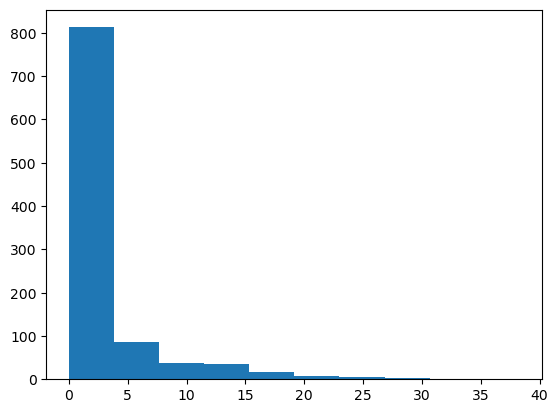

0.01


In [11]:
plt.hist(df['rainfall'])
plt.show();
q_25 = df['rainfall'].quantile(0.25)
print(q_25)

(array([519.,  87.,  37.,  36.,  17.,   7.,   5.,   2.,   1.,   1.]),
 array([2.000e-02, 3.850e+00, 7.680e+00, 1.151e+01, 1.534e+01, 1.917e+01,
        2.300e+01, 2.683e+01, 3.066e+01, 3.449e+01, 3.832e+01]),
 <BarContainer object of 10 artists>)

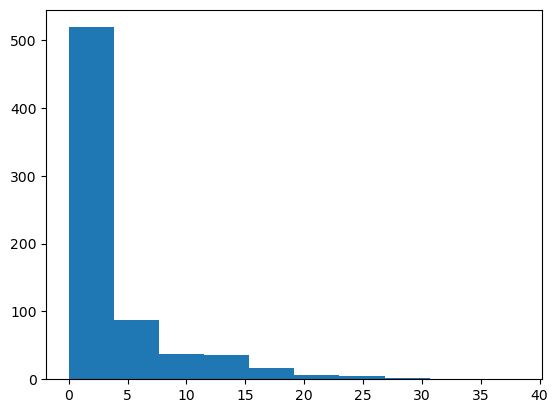

In [12]:
d = df['rainfall']
r_excl_0 = d[d > q_25]
plt.hist(r_excl_0)